Rudy SAULNIER
11204322


#   DM Turbomachine

In [1]:
# Bibliothèque

%matplotlib inline
%autosave 300
import numpy as np
import scipy as sp
import math as mp


import matplotlib.pyplot as plt

Autosaving every 300 seconds


## Première partie: tracé de la polaire pour M=2



Définition des variable global

In [2]:

_M1=None
_gamma=None
_n=None
_phi=None
_theta=None
_rg=None
_gm1=None
_gp1=None


Utilisation de la fonction dérivé fournie afin d'utiliser la méthode de Newton

In [3]:
#derivee a l'ordre 1

def derivee(f):
    def calcul(x, dx):
        return (f(x+dx) - f(x))/dx
    return calcul


Méthode de Newton qui est utiliser pour retrouver le zéro d'une fonction. 

In [4]:
#methode de Newton

def newton(f, x, dx=0.000001, tolerance=0.000001):
    '''f is the function f(x)'''
    df = derivee(f)
    niter=0
    while True:
        x1 = x - f(x)/df(x, dx)
        t = abs(x1 - x)
        if t < tolerance:
            break
        if niter>100:
            break 
        x = x1
        niter = niter+1
    return x

Fonction fournie qui renvoie la valeur de x en fonction de _phi

In [5]:
#Fonction que nous souhaitons annuler

def f(x):
    global _phi,_rg,_M1,_gm1
    a=(mp.tan(x-_phi)/mp.tan(x))-(_rg)*(1.+2./((_gm1*_M1**2)*(mp.sin(x))**2))
    return a

In [6]:
#valeur des variable


_M1=2.
_gamma=1.4
_gm1=_gamma-1.
_gp1=_gamma+1.
_phi=1.
_rg=_gm1/_gp1

#Calcul de la polaire




Définition d'une fonction permettant de calculer une polaire en fonction du nombre de Mach

In [7]:

def polaire(M1,gamma=1.4):
    global _M1,_gamma,_gm1,_gp1,_phi,_rg
    _M1=M1
    _gmma=gamma
    
    dx=0.1                         #définitionn du premier dx
    x_approx=mp.asin(1./_M1)       #première valeur de x pour la polaire du bas
    x_approx1=np.pi/2.             #première valeur de x pour la polaire du haut
    _phi=dx                        #premier pas de _phi (appeler theta dans le cours)



    xb=[x_approx]
    xh=[x_approx1]
    theta=[0.0]

    i=0
    while xh[i]>xb[i]:              #tent que la polaire du au et la polaire du bas ne ce croise pas
        xh.append(newton(f, xh[i]))     #On rajoute la valeur de la fonction newton pour la polaire du haut
        xb.append(newton(f , xb[i]))    # De même pour la polaire du bas
        theta.append(_phi)              # On enregistre la valeur de theta afin de pouvoir tracer la polaire par la suite


        while abs(xh[i+1]-xh[i])>0.01 or abs(xb[i]-xb[i+1])>0.01: # Si la fonction Newton renvoi une valeur éronée

            if dx<0.0000001:
                break

            else:
                
                _phi=_phi-dx

                dx=dx/10.  #On réduit le dx jusqu'a ce que la fonction Newton renvoi une valeur satisfesante

                _phi=_phi+dx

                xh[i+1]=newton(f,xh[i])

                xb[i+1]=newton(f,xb[i])

                theta[i+1]=_phi

        _phi=_phi+dx
        i=i+1


    #Passage au degré et calcul du rapport P/Po:



    theta_neg=list(theta)
    P_P1_h=list(theta)
    P_P1_b=list(theta)
    
    for i in range (np.size(theta)):

        P_P1_h[i]=1+2*_gamma/(_gamma+1)*(_M1**2*np.sin(xh[i])**2-1)
        P_P1_b[i]=1+2*_gamma/(_gamma+1)*(_M1**2*np.sin(xb[i])**2-1)


        theta[i]=theta[i]*360.0/(2*np.pi)
        xb[i]=xb[i]*360.0/(2*np.pi)
        xh[i]=xh[i]*360.0/(2*np.pi)

        theta_neg[i]=-theta[i]
    
    
    
    return theta,theta_neg,xb,xh,P_P1_b,P_P1_h

# Calcul de tous les tableau nécessaire pour réaliser le tracé des polaire

In [8]:
theta,theta_neg,xb,xh,P_P1_b,P_P1_h=polaire(2.0) #Appelle de la fonction "polaire" pour un nombre de Mach=2

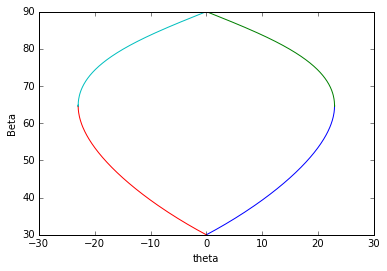

In [9]:
#Tracer de la polaire
plt.plot(theta,xb)
plt.plot(theta,xh)
plt.plot(theta_neg,xb)
plt.plot(theta_neg,xh)
plt.xlabel('theta')
plt.ylabel('Beta')

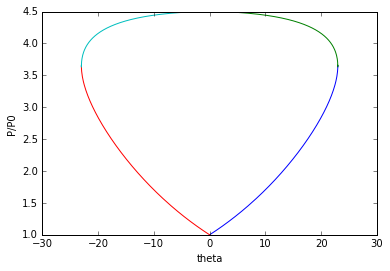

In [10]:
#Tracer de la polaire en fonction de P/P0
plt.plot(theta,P_P1_b)
plt.plot(theta,P_P1_h)
plt.plot(theta_neg,P_P1_b)
plt.plot(theta_neg,P_P1_h)
plt.xlabel('theta')
plt.ylabel('P/P0')

On peut constater que la polaire à la forme attendue.

# 2ème partie, réflexion de choc


Dans cette partie nous allons tracer la polaire de réfléxion de choc 

In [11]:
def reflexion(i):   #Fonction permettant de calculer la réflexion de choc
    
    _M1=2.

    Mn1=_M1*(mp.sin(mp.radians(xb[i])))
    Mn2=(1.+0.5*_gm1*Mn1**2)/(_gamma*Mn1**2-_gm1/2.)
    Mn2=mp.sqrt(Mn2)
    M2=Mn2/mp.sin(mp.radians(xb[i]-_phi))  #Calcul du Mach après le premier choc
  

    theta1,theta_neg1,xb1,xh1,P_P1_b1,P_P1_h1=polaire(M2)  #Calcul de tous les tableaux nécessaire au tracer de la polaire avec le nouveaux nombre de Mach



    a=theta[i]


    b=P_P1_b[i]-P_P1_b1[0]



    for i in range (np.size(theta1)):
        theta1[i]=theta1[i]-a
        theta_neg1[i]=theta_neg1[i]-a

        P_P1_b1[i]=P_P1_b1[i]+b
        P_P1_h1[i]=P_P1_h1[i]+b
        
        
        
        
    return theta1,theta_neg1,P_P1_b1,P_P1_h1,M2

# Recherche du point critique

Ici on cherche le moment ou la polaire de choc croise le zéro. Ce point est un point critique car passer ce point la polaire n'a pas de solution.

In [12]:
#Afin de réduire le temps de calcul on place le premier point a calculer a 26.

i=26
theta1,theta_neg1,P_P1_b1,P_P1_h1,M2=reflexion(i)
while theta1[-1]>0:
    i=i+1
    
    theta1,theta_neg1,P_P1_b1,P_P1_h1,M2=reflexion(i)
    if i>np.size(theta):
        break

print theta1[-1]
print M2

-0.0382162849352
1.36212911271


On peut voir que  la valeur max de theta=-0.037. Ce point tend vers 0 et est donc le point critique. On a une valeur de M2=1.36.

On a ensuite tracé la solution:

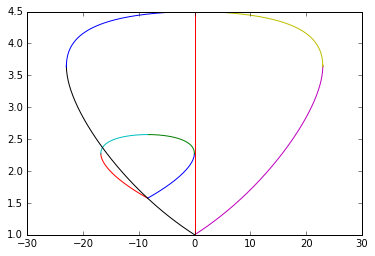

In [13]:
plt.plot(theta1,P_P1_b1)
plt.plot(theta1,P_P1_h1)
plt.plot(theta_neg1,P_P1_b1)
plt.plot(theta_neg1,P_P1_h1)
plt.plot(theta,P_P1_b)
plt.plot(theta,P_P1_h)
plt.plot(theta_neg,P_P1_b)
plt.plot(theta_neg,P_P1_h)
plt.plot([0,0],[1.0,4.5],color='r')
